**INSTITUTO TECNOLÓGICO DE ESTUDIOS SUPERIORES DE MONTERREY**

**Escuela de Ingeniería y Ciencias - Ingeniería en Ciencia de Datos y Matemáticas**

## Evidencia Final
### Proyecto de aprendizaje supervisado
Modelación del aprendizaje con inteligencia artificial (Gpo 302) - TC2034.302

**Profesora:** Dra. María Valentina Narváez Terán

**Equipo 3**

Annette Pamela Ruiz Abreu - A01423595

Leslie Ramos Gutiérrez - A01562461

Rodrigo González Zermeño - A00572213

Sarah Dorado Romo - A01540946

Monterrey, Nuevo León. 04 de junio de 2023


In [667]:
# Librerías
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import warnings
warnings.filterwarnings("ignore")
import random


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pickle
from mpl_toolkits.mplot3d import Axes3D

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn import metrics 
import missingno as msno


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from pywaffle import Waffle


Datos: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


In [668]:
# Cargar datos
raw_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

## Exploración de datos (crudos)

In [669]:
print("Cantidad de filas:", len(raw_data))
print("Cantidad de columnas:", len(raw_data.columns))

Cantidad de filas: 5110
Cantidad de columnas: 12


In [670]:
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [671]:
raw_data.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [672]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [673]:
raw_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

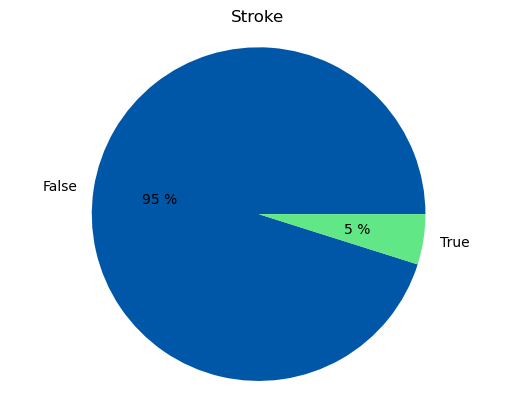

In [674]:
# Exploración de columna de interés (label)

raw_data["stroke"].value_counts()
plt.pie(raw_data["stroke"].value_counts(),labels=["False","True"], autopct="%0.0f %%", colors=["#0057A7", "#61E786"])
plt.axis("equal")
plt.title("Stroke")
plt.show()

In [675]:
raw_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [676]:
for i in raw_data.drop(labels=["id", "age", "avg_glucose_level", "bmi"], axis=1):
    display(pd.DataFrame(raw_data[i].value_counts()))


,gender
Female,2994
Male,2115
Other,1


,hypertension
0,4612
1,498


,heart_disease
0,4834
1,276


,ever_married
Yes,3353
No,1757


,work_type
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


,Residence_type
Urban,2596
Rural,2514


,smoking_status
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


,stroke
0,4861
1,249


## Limpieza de datos

In [677]:
datos = raw_data
no_bmi = datos[datos["bmi"].isna()]

# Como "bmi" es la única columna que tiene datos vacíos, llenaremos esos datos vacíos con la mediana
datos['bmi'].fillna(round (datos['bmi'].median(), 2), inplace=True)
datos = datos.drop("id", axis=1).reset_index(drop=True)

# Eliminamos el dato que no tiene género (dice "Otro")
datos = datos.drop(datos[datos["gender"]=="Other"].index)



In [678]:
# Creación de categorías para la visualización

datos['bmi_category'] = pd.cut(datos['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
datos['age_group'] = pd.cut(datos['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
datos['glucose_category'] = pd.cut(datos['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

datos.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_group,glucose_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesity,Elderly,High
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight,Elderly,High
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obesity,Elderly,Normal
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obesity,Mid Adults,High
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Ideal,Elderly,High


In [679]:
# Transformación de datos para optimizar memoria

datos["gender"] = datos["gender"].astype("category")
datos["hypertension"] = datos["hypertension"].astype("bool")
datos["heart_disease"] = datos["heart_disease"].astype("bool")
datos["ever_married"] = datos["ever_married"].replace({"Yes":1, "No":0}).astype("bool")
datos["work_type"] = datos["work_type"].astype("category")
datos["Residence_type"] = datos["Residence_type"].astype("category")
datos["smoking_status"] = datos["smoking_status"].astype("category")
datos["stroke"] = datos["stroke"].astype("bool")


## Exploración de datos limpios

In [680]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   category
 1   age                5109 non-null   float64 
 2   hypertension       5109 non-null   bool    
 3   heart_disease      5109 non-null   bool    
 4   ever_married       5109 non-null   bool    
 5   work_type          5109 non-null   category
 6   Residence_type     5109 non-null   category
 7   avg_glucose_level  5109 non-null   float64 
 8   bmi                5109 non-null   float64 
 9   smoking_status     5109 non-null   category
 10  stroke             5109 non-null   bool    
 11  bmi_category       5109 non-null   category
 12  age_group          5109 non-null   category
 13  glucose_category   5109 non-null   category
dtypes: bool(4), category(7), float64(3)
memory usage: 215.8 KB


In [681]:
print("Cantidad de filas:", len(datos))
print("Cantidad de columnas:", len(datos.columns))

Cantidad de filas: 5109
Cantidad de columnas: 14


In [682]:
# Exploración datos cuantitativos
datos.describe()


,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.229986,106.140399,28.863300
std,22.613575,45.285004,7.699785
min,0.080000,55.120000,10.300000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


In [683]:
pd.DataFrame(datos.agg(stat.mode)).rename(columns={0:"mode"})

,mode
gender,Female
age,78.0
hypertension,False
heart_disease,False
ever_married,True
work_type,Private
Residence_type,Urban
avg_glucose_level,93.88
bmi,28.1
smoking_status,never smoked


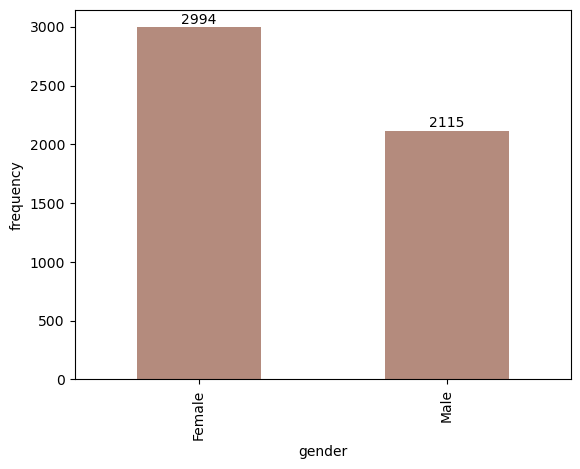

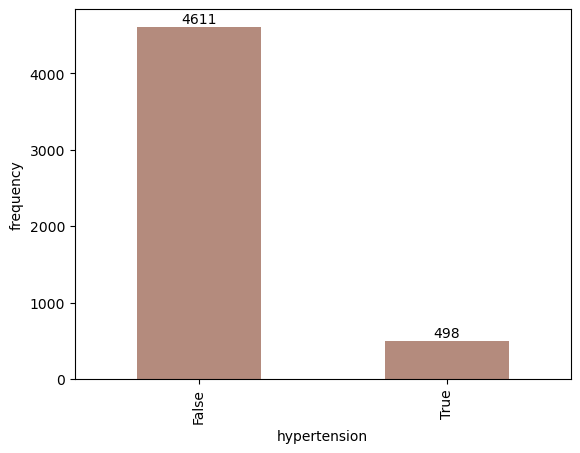

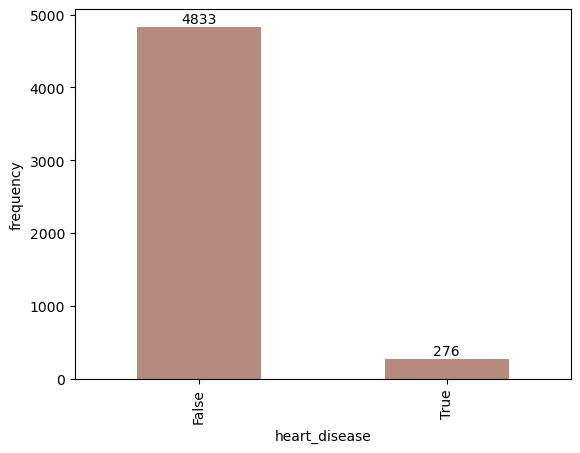

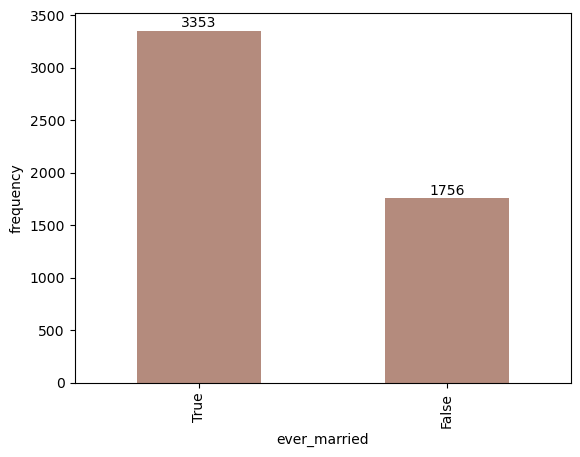

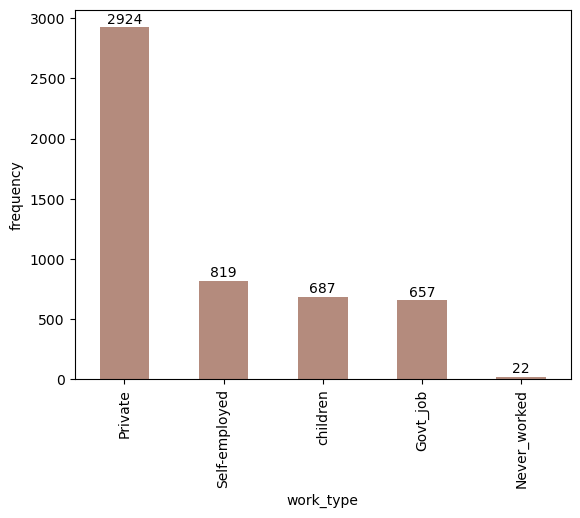

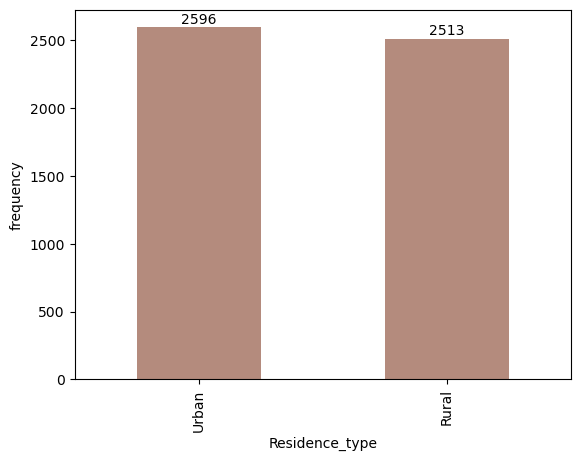

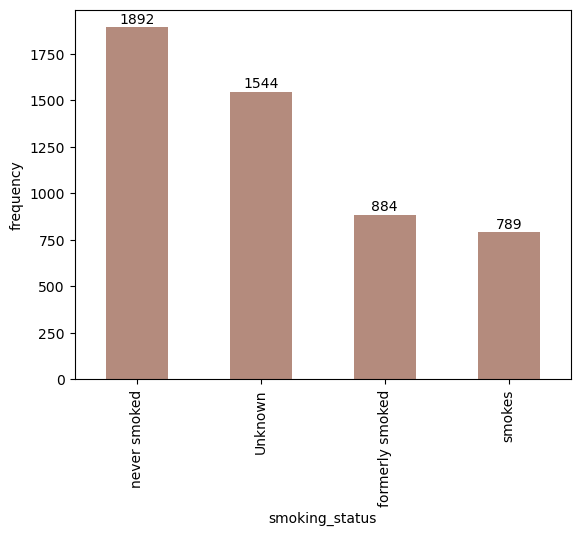

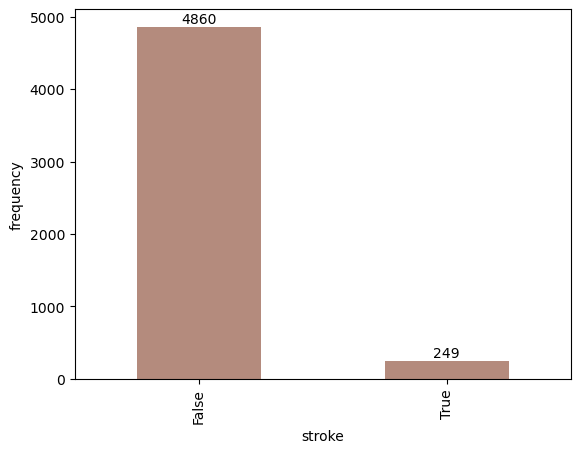

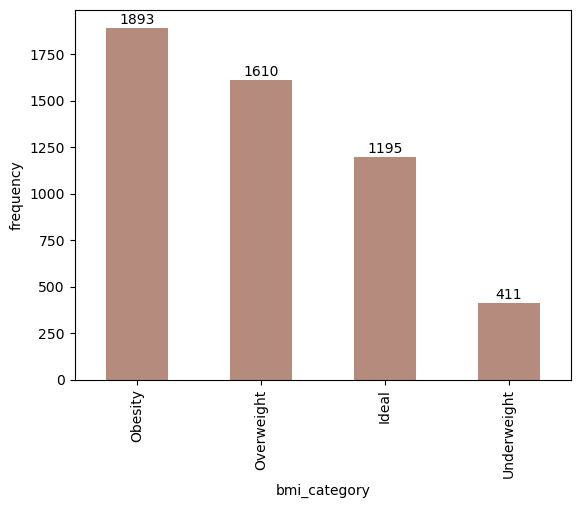

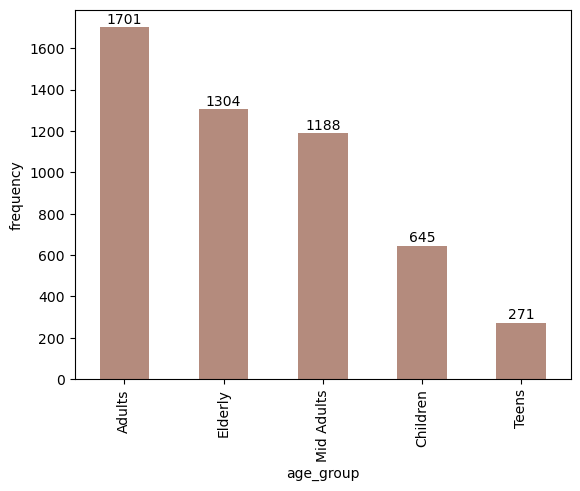

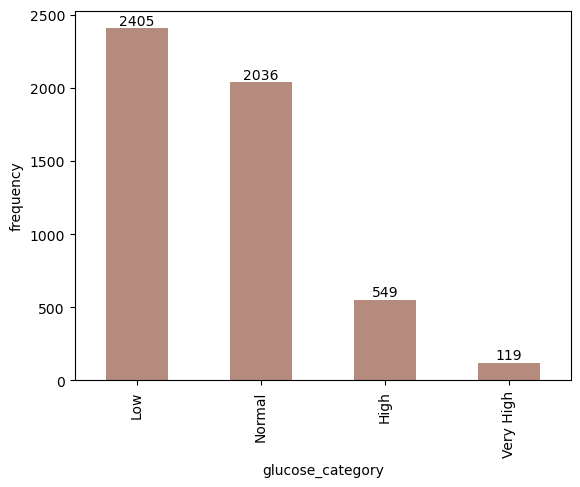

In [684]:
# Exploración variables cualitativas

for i in datos.drop(labels=["age", "avg_glucose_level", "bmi"], axis=1):
    fig = datos[i].value_counts().plot(kind='bar', xlabel=i , ylabel='frequency', color="#B48B7D")
    rects = fig.patches

    # Make some labels.
    labels = [j for j in datos[i].value_counts()]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        fig.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )

    plt.show()
    print("\n\n")


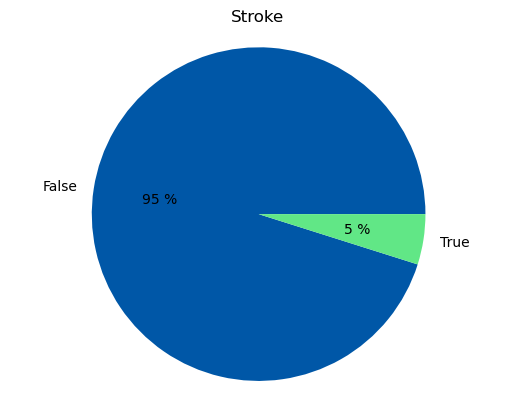

In [685]:
# Exploración de columna de interés (label)
plt.pie(datos["stroke"].value_counts(),labels=["False","True"], autopct="%0.0f %%", colors=["#0057A7", "#61E786"])
plt.axis("equal")
plt.title("Stroke")
plt.show()

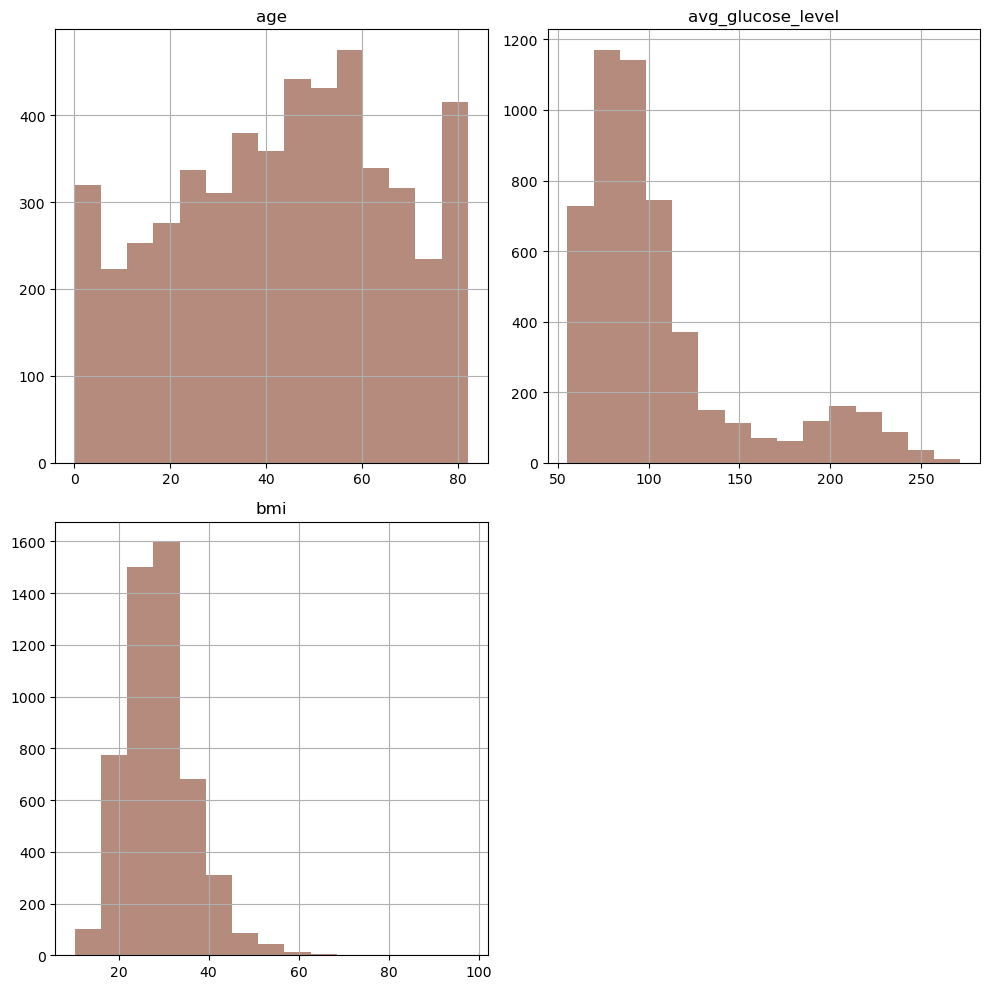

In [686]:
datos.hist(bins=15, figsize=(10,10), color="#B48B7D")
plt.tight_layout()


stroke
age_group  stroke        
Children   False      644
           True         1
Teens      False      270
           True         1
Adults     False     1690
           True        11
Mid Adults False     1129
           True        59
Elderly    False     1127
           True       177

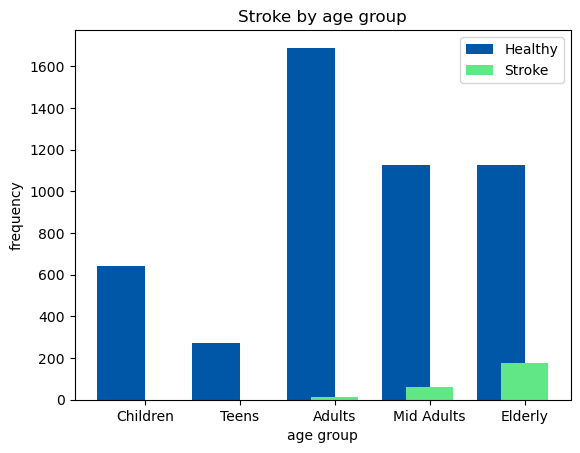

In [687]:
# Análisis de edad

grouped_age = pd.DataFrame(datos.groupby(["age_group"])["stroke"].value_counts())
display(grouped_age)

stroke_age = datos[datos['stroke'] == 1].age_group.value_counts().sort_index(ascending=True)
healthy_age = datos[datos['stroke'] == 0].age_group.value_counts().sort_index(ascending=True)

labels=[" "]+list(stroke_age.index.categories)


x = np.arange(len(stroke_age.values))
width = 0.5


fig, ax = plt.subplots()
ax.bar(x-width/2, healthy_age.values, width, label="Healthy", color="#0057A7")
ax.bar(x, stroke_age.values, width, label="Stroke", color="#61E786")


ax.set_title("Stroke by age group")
ax.set_ylabel("frequency")
ax.set_xlabel("age group")
ax.set_xticklabels(labels)
plt.legend()
plt.show()


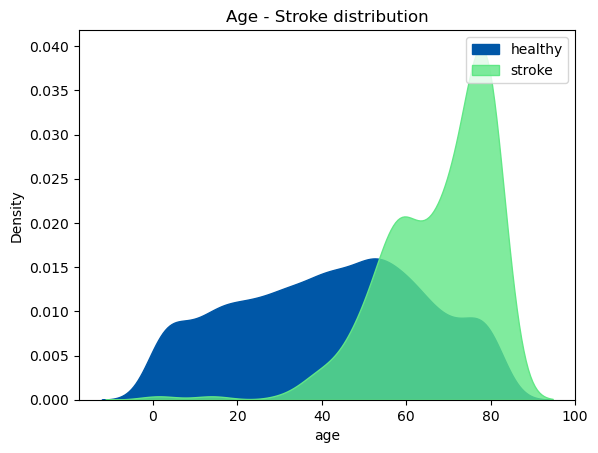

In [688]:
sns.kdeplot(data = datos[datos['stroke'] == 0], x = 'age', shade = True,  alpha = 1, color = '#0057A7', label="healthy")
sns.kdeplot(data = datos[datos['stroke'] == 1], x = 'age', shade = True,  alpha = 0.8, color = '#61E786', label="stroke")
plt.title("Age - Stroke distribution")
plt.legend()
plt.show()


stroke
glucose_category stroke        
Low              False     2316
                 True        89
Normal           False     1965
                 True        71
High             False      478
                 True        71
Very High        False      101
                 True        18

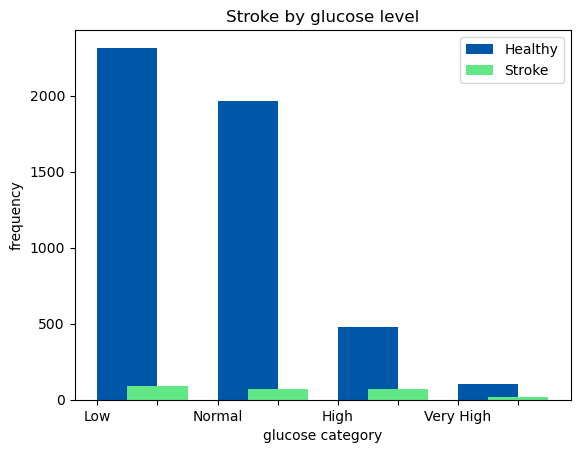

In [689]:
# Análisis de glucosa
glucosa = pd.DataFrame(datos.groupby(["glucose_category"])["stroke"].value_counts())
display(glucosa)

stroke_cat = datos[datos['stroke'] == 1].glucose_category.value_counts().sort_index(ascending=True)
healthy_cat = datos[datos['stroke'] == 0].glucose_category.value_counts().sort_index(ascending=True)

labels = list(stroke_cat.index.categories)
labels = [" ", labels[0], " ", labels[1], " ", labels[2], " ", labels[3]]

x = np.arange(len(stroke_cat.values))
width = 0.5


fig, ax = plt.subplots()
ax.bar(x-width/2, healthy_cat.values, width, label="Healthy", color="#0057A7")
ax.bar(x, stroke_cat.values, width, label="Stroke", color="#61E786")


ax.set_title("Stroke by glucose level")
ax.set_ylabel("frequency")
ax.set_xlabel("glucose category")
ax.set_xticklabels(labels)
plt.legend()
plt.show()


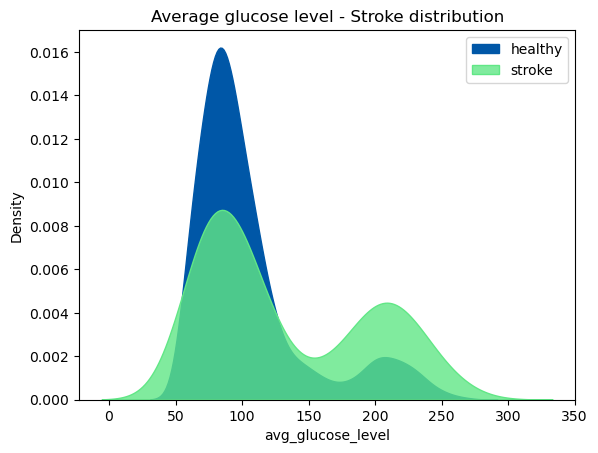

In [690]:
sns.kdeplot(data = datos[datos['stroke'] == 0], x = 'avg_glucose_level', shade = True,  alpha = 1, color = '#0057A7', label="healthy")
sns.kdeplot(data = datos[datos['stroke'] == 1], x = 'avg_glucose_level', shade = True,  alpha = 0.8, color = '#61E786', label="stroke")
plt.title("Average glucose level - Stroke distribution")
plt.legend()
plt.show()

stroke
bmi_category stroke        
Underweight  False      410
             True         1
Ideal        False     1158
             True        37
Overweight   False     1495
             True       115
Obesity      False     1797
             True        96

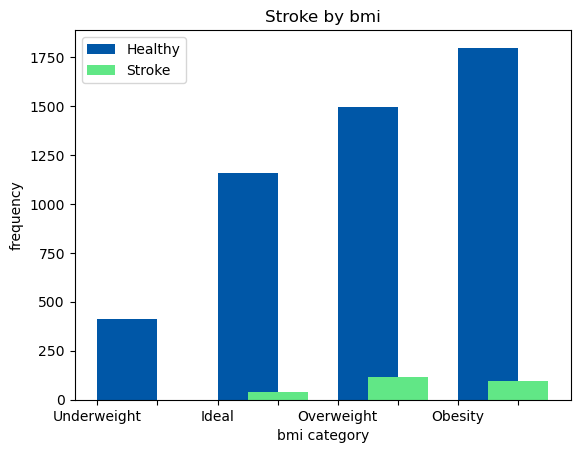

In [691]:
# Análisis de bmi
bmi = pd.DataFrame(datos.groupby(["bmi_category"])["stroke"].value_counts())
display(bmi)

stroke_bmi = datos[datos['stroke'] == 1].bmi_category.value_counts().sort_index(ascending=True)
healthy_bmi = datos[datos['stroke'] == 0].bmi_category.value_counts().sort_index(ascending=True)

labels = list(stroke_bmi.index.categories)
labels = [" ", labels[0], " ", labels[1], " ", labels[2], " ", labels[3]]

x = np.arange(len(stroke_bmi.values))
width = 0.5


fig, ax = plt.subplots()
ax.bar(x-width/2, healthy_bmi.values, width, label="Healthy", color="#0057A7")
ax.bar(x, stroke_bmi.values, width, label="Stroke", color="#61E786")


ax.set_title("Stroke by bmi")
ax.set_ylabel("frequency")
ax.set_xlabel("bmi category")
ax.set_xticklabels(labels)
plt.legend()
plt.show()


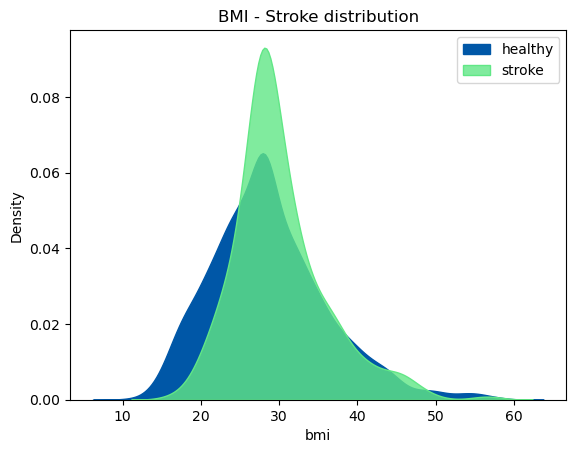

In [692]:
d = datos[datos['stroke'] == 0]
a = datos[datos['stroke'] == 1]
sns.kdeplot(data = d[d["bmi"]<=60], x = 'bmi', shade = True,  alpha = 1, color = '#0057A7', label="healthy")
sns.kdeplot(data = a[a["bmi"]<=60], x = 'bmi', shade = True,  alpha = 0.8, color = '#61E786', label="stroke")
plt.title("BMI - Stroke distribution")
plt.legend()
plt.show()

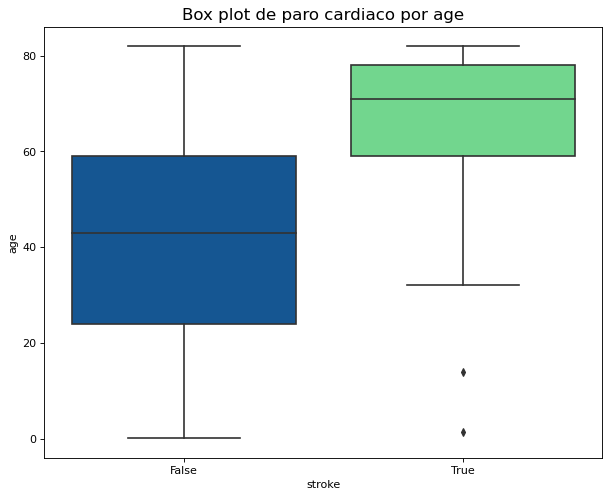

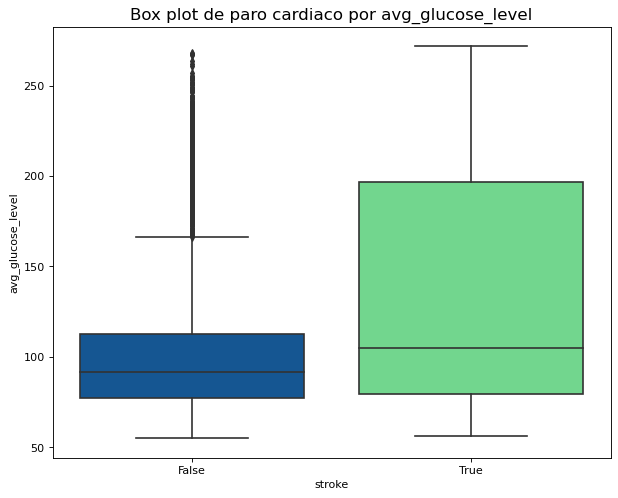

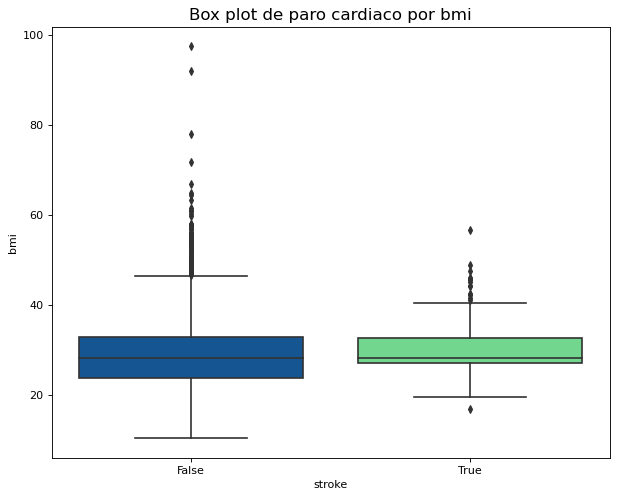

In [693]:
# Boxplots
cuantitativas = ["age", "avg_glucose_level", "bmi"]

for i in cuantitativas:
    plt.figure(figsize=(9,7), dpi= 80)
    sns.boxplot(x='stroke', y=i, data=datos, notch=False, palette=["#0057A7", "#61E786"])
    title = 'Box plot de paro cardiaco por '+i
    plt.title(title, fontsize=15)
    plt.show()



In [694]:
healthy_col = "#0057A7"
stroke_col = "#61E786"

stroke
gender stroke        
Female False     2853
       True       141
Male   False     2007
       True       108

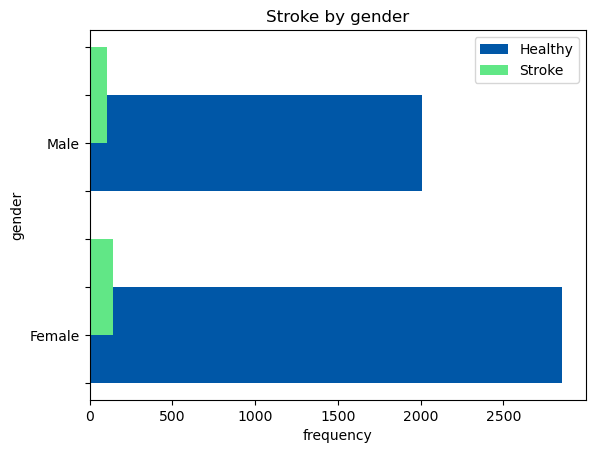

In [695]:
gender = pd.DataFrame(datos.groupby(["gender"])["stroke"].value_counts())
display(gender)

stroke_gender = datos[datos['stroke'] == 1].gender.value_counts().sort_index(ascending=True)
healthy_gender = datos[datos['stroke'] == 0].gender.value_counts().sort_index(ascending=True)

labels = list(stroke_gender.index.categories)
labels = [" ", " ", labels[0], " ", " ", " ", labels[1]]

x = np.arange(len(stroke_gender.values))
width = 0.5


fig, ax = plt.subplots()
ax.barh(x-width/2, healthy_gender.values, width, label="Healthy", color=healthy_col)
ax.barh(x, stroke_gender.values, width, label="Stroke", color=stroke_col)


ax.set_title("Stroke by gender")
ax.set_xlabel("frequency")
ax.set_ylabel("gender")
ax.set_yticklabels(labels)
plt.legend()
plt.show()


stroke
hypertension stroke        
False        False     4428
             True       183
True         False      432
             True        66

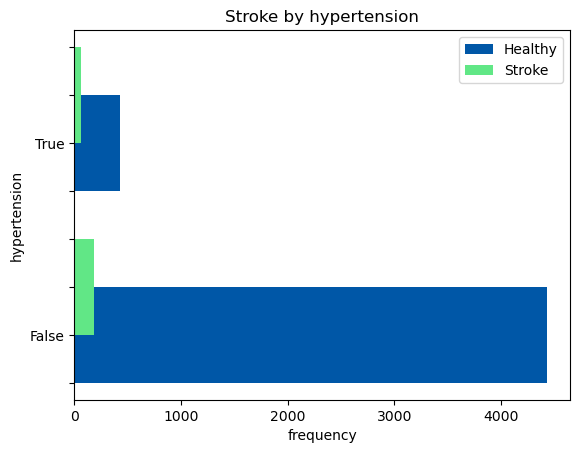

In [696]:
hypertension = pd.DataFrame(datos.groupby(["hypertension"])["stroke"].value_counts())
display(hypertension)

stroke_hypertension = datos[datos['stroke'] == 1].hypertension.value_counts().sort_index(ascending=True)
healthy_hypertension = datos[datos['stroke'] == 0].hypertension.value_counts().sort_index(ascending=True)


x = np.arange(len(stroke_hypertension.values))
width = 0.5


fig, ax = plt.subplots()
ax.barh(x-width/2, healthy_hypertension.values, width, label="Healthy", color=healthy_col)
ax.barh(x, stroke_hypertension.values, width, label="Stroke", color=stroke_col)


ax.set_title("Stroke by hypertension")
ax.set_xlabel("frequency")
ax.set_ylabel("hypertension")
ax.set_yticklabels(["", "", "False", "", "", "", "True"])
plt.legend()
plt.show()

stroke
heart_disease stroke        
False         False     4631
              True       202
True          False      229
              True        47

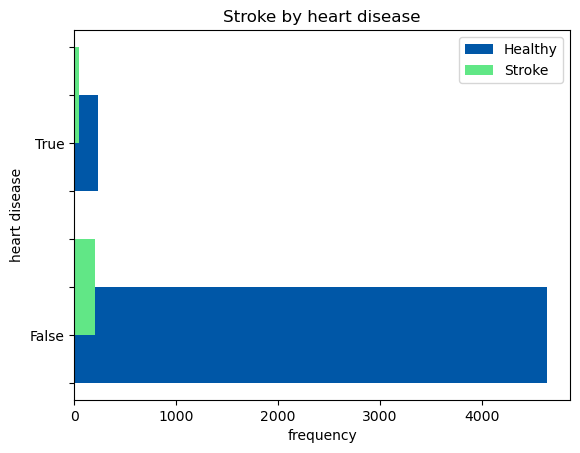

In [697]:
heart = pd.DataFrame(datos.groupby(["heart_disease"])["stroke"].value_counts())
display(heart)

stroke_heart = datos[datos['stroke'] == 1].heart_disease.value_counts().sort_index(ascending=True)
healthy_heart = datos[datos['stroke'] == 0].heart_disease.value_counts().sort_index(ascending=True)


x = np.arange(len(stroke_heart.values))
width = 0.5


fig, ax = plt.subplots()
ax.barh(x-width/2, healthy_heart.values, width, label="Healthy", color=healthy_col)
ax.barh(x, stroke_heart.values, width, label="Stroke", color=stroke_col)


ax.set_title("Stroke by heart disease")
ax.set_xlabel("frequency")
ax.set_ylabel("heart disease")
ax.set_yticklabels(["", "", "False", "", "", "", "True"])
plt.legend()
plt.show()

stroke
ever_married stroke        
False        False     1727
             True        29
True         False     3133
             True       220

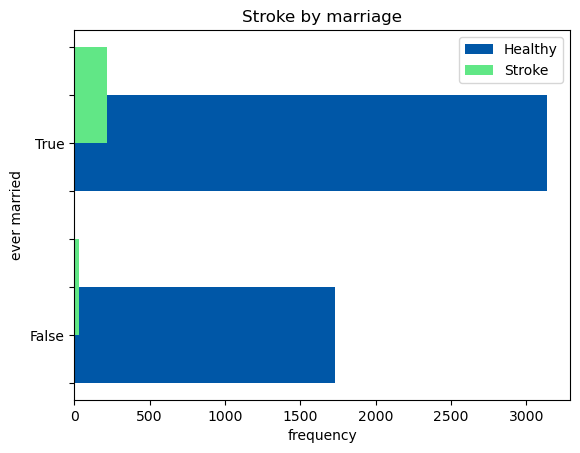

In [698]:
marriage = pd.DataFrame(datos.groupby(["ever_married"])["stroke"].value_counts())
display(marriage)

stroke_marriage = datos[datos['stroke'] == 1].ever_married.value_counts().sort_index(ascending=True)
healthy_marriage = datos[datos['stroke'] == 0].ever_married.value_counts().sort_index(ascending=True)


x = np.arange(len(stroke_marriage.values))
width = 0.5


fig, ax = plt.subplots()
ax.barh(x-width/2, healthy_marriage.values, width, label="Healthy", color=healthy_col)
ax.barh(x, stroke_marriage.values, width, label="Stroke", color=stroke_col)


ax.set_title("Stroke by marriage")
ax.set_xlabel("frequency")
ax.set_ylabel("ever married")
ax.set_yticklabels(["", "", "False", "", "", "", "True"])
plt.legend()
plt.show()

stroke
work_type     stroke        
Govt_job      False      624
              True        33
Never_worked  False       22
Private       False     2775
              True       149
Self-employed False      754
              True        65

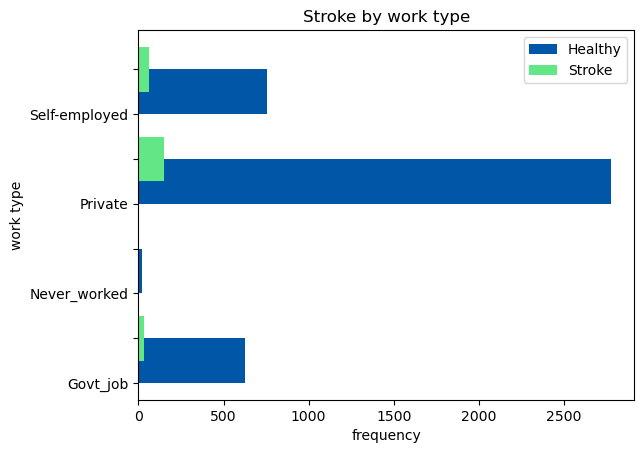

In [699]:
work = pd.DataFrame(datos.groupby(["work_type"])["stroke"].value_counts()).drop("children")
display(work)

stroke_work = datos[datos['stroke'] == 1].work_type.value_counts().sort_index(ascending=True).drop("children")
healthy_work = datos[datos['stroke'] == 0].work_type.value_counts().sort_index(ascending=True).drop("children")

labels = list(stroke_work.index.categories)
labels = [" ", labels[0], " ", labels[1], " ", labels[2], " ", labels[3]]

x = np.arange(len(stroke_work.values))
width = 0.5


fig, ax = plt.subplots()
ax.barh(x-width/2, healthy_work.values, width, label="Healthy", color=healthy_col)
ax.barh(x, stroke_work.values, width, label="Stroke", color=stroke_col)


ax.set_title("Stroke by work type")
ax.set_xlabel("frequency")
ax.set_ylabel("work type")
ax.set_yticklabels(labels)
plt.legend()
plt.show()

stroke
Residence_type stroke        
Rural          False     2399
               True       114
Urban          False     2461
               True       135

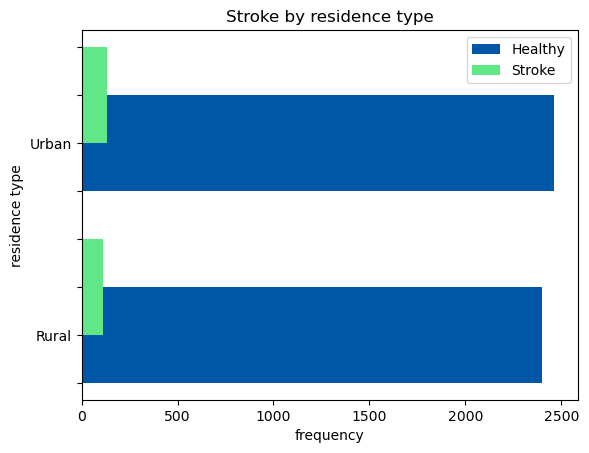

In [700]:
residence = pd.DataFrame(datos.groupby(["Residence_type"])["stroke"].value_counts())
display(residence)

stroke_residence = datos[datos['stroke'] == 1].Residence_type.value_counts().sort_index(ascending=True)
healthy_residence = datos[datos['stroke'] == 0].Residence_type.value_counts().sort_index(ascending=True)

labels = list(stroke_residence.index.categories)
labels = [" ", " ", labels[0], " ", " ", " ", labels[1]]

x = np.arange(len(stroke_residence.values))
width = 0.5


fig, ax = plt.subplots()
ax.barh(x-width/2, healthy_residence.values, width, label="Healthy", color=healthy_col)
ax.barh(x, stroke_residence.values, width, label="Stroke", color=stroke_col)


ax.set_title("Stroke by residence type")
ax.set_xlabel("frequency")
ax.set_ylabel("residence type")
ax.set_yticklabels(labels)
plt.legend()
plt.show()

stroke
smoking_status  stroke        
Unknown         False     1497
                True        47
formerly smoked False      814
                True        70
never smoked    False     1802
                True        90
smokes          False      747
                True        42

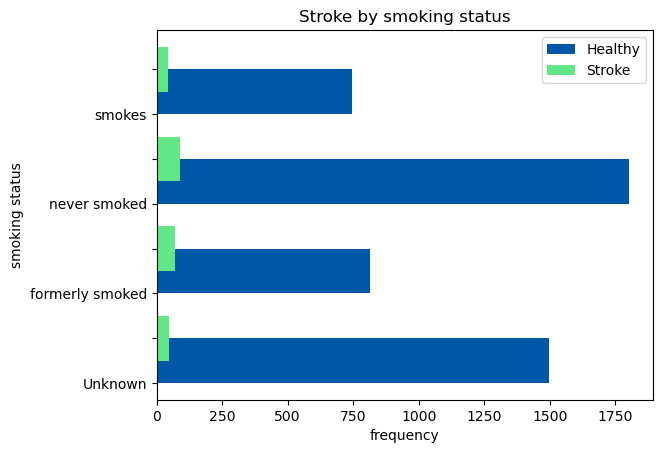

In [701]:
smoking = pd.DataFrame(datos.groupby(["smoking_status"])["stroke"].value_counts())
display(smoking)

stroke_smoking = datos[datos['stroke'] == 1].smoking_status.value_counts().sort_index(ascending=True)
healthy_smoking = datos[datos['stroke'] == 0].smoking_status.value_counts().sort_index(ascending=True)

labels = list(stroke_smoking.index.categories)
labels = [" ", labels[0], " ", labels[1], " ", labels[2], " ", labels[3]]

x = np.arange(len(stroke_smoking.values))
width = 0.5


fig, ax = plt.subplots()
ax.barh(x-width/2, healthy_smoking.values, width, label="Healthy", color=healthy_col)
ax.barh(x, stroke_smoking.values, width, label="Stroke", color=stroke_col)


ax.set_title("Stroke by smoking status")
ax.set_xlabel("frequency")
ax.set_ylabel("smoking status")
ax.set_yticklabels(labels)
plt.legend()
plt.show()

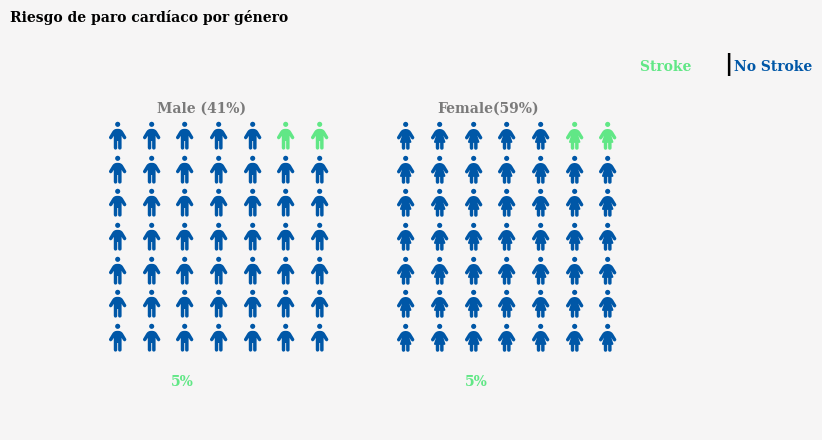

In [702]:
df = datos

stroke_gen = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gen = df[df['stroke'] == 0]['gender'].value_counts()

female = df['gender'].value_counts().values[0]
male =  df['gender'].value_counts().values[1]

stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))

female_per = int(round(female/(female+male) * 100, 0))
male_per = int(round(male/(female+male)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {121:
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_male,stroke_male],
                            'colors' : [healthy_col, stroke_col],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          122 :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_female,stroke_female],         
                              'colors' : [healthy_col, stroke_col],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)


fig.text(0., 0.8, 'Riesgo de paro cardíaco por género', {'font':'Serif', 'color':'black', 'weight':'bold'})
fig.text(0.24, 0.22, 'ooo', {'font':'Serif','weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif','weight':'bold', 'color':'#f6f5f5'})
fig.text(0.23, 0.28, '{}%'.format(100-healthy_male), {'font':'Serif','weight':'bold' ,'color':stroke_col},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(100-healthy_female), {'font':'Serif','weight':'bold', 'color':stroke_col}, alpha = 1)
fig.text(0.21, 0.67, 'Male ({}%)'.format(male_per), {'font':'Serif','weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.67, 'Female({}%)'.format(female_per), {'font':'Serif','weight':'bold', 'color':'black'}, alpha = 0.5)


fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','weight':'bold','style':'normal', 'color':stroke_col})
fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold','style':'normal', 'weight':'bold','color':healthy_col},alpha = 1)


fig.show()

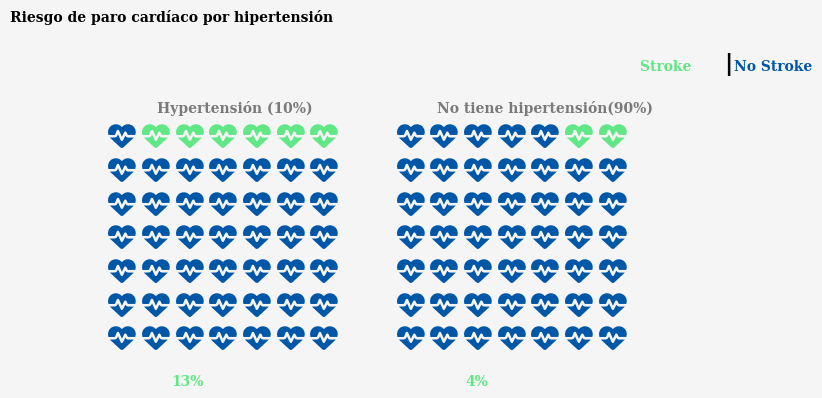

In [703]:
stroke_hypertension = df[df['stroke'] == 1]['hypertension'].value_counts()
healthy_hypertension = df[df['stroke'] == 0]['hypertension'].value_counts()

no = df['hypertension'].value_counts().values[0]
yes =  df['hypertension'].value_counts().values[1]

stroke_no = int(round (stroke_hypertension.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_hypertension.values[1] / yes *100, 0))
healthy_no = int(round(healthy_hypertension.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_hypertension.values[1] / yes *100, 0))

no_per = int(round(no/(no+yes) * 100, 0))
yes_per = int(round(yes/(no+yes)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {121:
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_yes,stroke_yes],
                            'colors' : [healthy_col, stroke_col],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'heartbeat',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          122 :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_no,stroke_no],         
                              'colors' : [healthy_col, stroke_col],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'heartbeat',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)


fig.text(0., 0.8, 'Riesgo de paro cardíaco por hipertensión', {'font':'Serif', 'color':'black', 'weight':'bold'})
fig.text(0.23, 0.28, '{}%'.format(100-healthy_yes), {'font':'Serif','weight':'bold' ,'color':stroke_col},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(100-healthy_no), {'font':'Serif','weight':'bold', 'color':stroke_col}, alpha = 1)
fig.text(0.21, 0.67, 'Hypertensión ({}%)'.format(yes_per), {'font':'Serif','weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.67, 'No tiene hipertensión({}%)'.format(no_per), {'font':'Serif','weight':'bold', 'color':'black'}, alpha = 0.5)


fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','weight':'bold','style':'normal', 'color':stroke_col})
fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold','style':'normal', 'weight':'bold','color':healthy_col},alpha = 1)


fig.show()

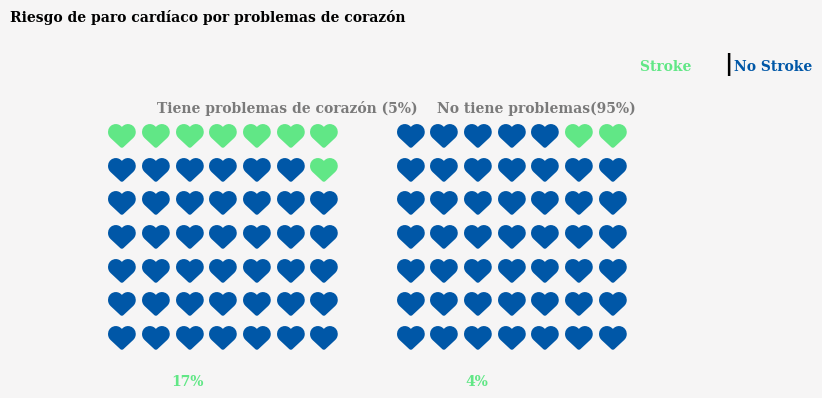

In [704]:
stroke_hypertension = df[df['stroke'] == 1]['heart_disease'].value_counts()
healthy_hypertension = df[df['stroke'] == 0]['heart_disease'].value_counts()

no = df['heart_disease'].value_counts().values[0]
yes =  df['heart_disease'].value_counts().values[1]

stroke_no = int(round (stroke_hypertension.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_hypertension.values[1] / yes *100, 0))
healthy_no = int(round(healthy_hypertension.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_hypertension.values[1] / yes *100, 0))

no_per = int(round(no/(no+yes) * 100, 0))
yes_per = int(round(yes/(no+yes)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {121:
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_yes,stroke_yes],
                            'colors' : [healthy_col, stroke_col],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'heart',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          122 :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_no,stroke_no],         
                              'colors' : [healthy_col, stroke_col],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'heart',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)


fig.text(0., 0.8, 'Riesgo de paro cardíaco por problemas de corazón', {'font':'Serif', 'color':'black', 'weight':'bold'})
fig.text(0.23, 0.28, '{}%'.format(100-healthy_yes), {'font':'Serif','weight':'bold' ,'color':stroke_col},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(100-healthy_no), {'font':'Serif','weight':'bold', 'color':stroke_col}, alpha = 1)
fig.text(0.21, 0.67, 'Tiene problemas de corazón ({}%)'.format(yes_per), {'font':'Serif','weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.67, 'No tiene problemas({}%)'.format(no_per), {'font':'Serif','weight':'bold', 'color':'black'}, alpha = 0.5)


fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','weight':'bold','style':'normal', 'color':stroke_col})
fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold','style':'normal', 'weight':'bold','color':healthy_col},alpha = 1)


fig.show()

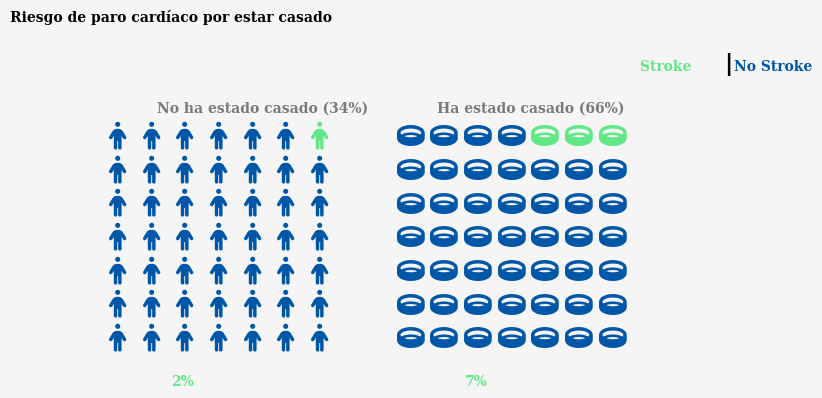

In [705]:
stroke_hypertension = df[df['stroke'] == 1]['ever_married'].value_counts()
healthy_hypertension = df[df['stroke'] == 0]['ever_married'].value_counts()

no = df['ever_married'].value_counts().values[0]
yes =  df['ever_married'].value_counts().values[1]

stroke_no = int(round (stroke_hypertension.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_hypertension.values[1] / yes *100, 0))
healthy_no = int(round(healthy_hypertension.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_hypertension.values[1] / yes *100, 0))

no_per = int(round(no/(no+yes) * 100, 0))
yes_per = int(round(yes/(no+yes)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {121:
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_yes,stroke_yes],
                            'colors' : [healthy_col, stroke_col],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'person',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          122 :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_no,stroke_no],         
                              'colors' : [healthy_col, stroke_col],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'ring',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)


fig.text(0., 0.8, 'Riesgo de paro cardíaco por estar casado', {'font':'Serif', 'color':'black', 'weight':'bold'})
fig.text(0.23, 0.28, '{}%'.format(100-healthy_yes), {'font':'Serif','weight':'bold' ,'color':stroke_col},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(100-healthy_no), {'font':'Serif','weight':'bold', 'color':stroke_col}, alpha = 1)
fig.text(0.21, 0.67, 'No ha estado casado ({}%)'.format(yes_per), {'font':'Serif','weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.67, 'Ha estado casado ({}%)'.format(no_per), {'font':'Serif','weight':'bold', 'color':'black'}, alpha = 0.5)


fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','weight':'bold','style':'normal', 'color':stroke_col})
fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold','style':'normal', 'weight':'bold','color':healthy_col},alpha = 1)


fig.show()

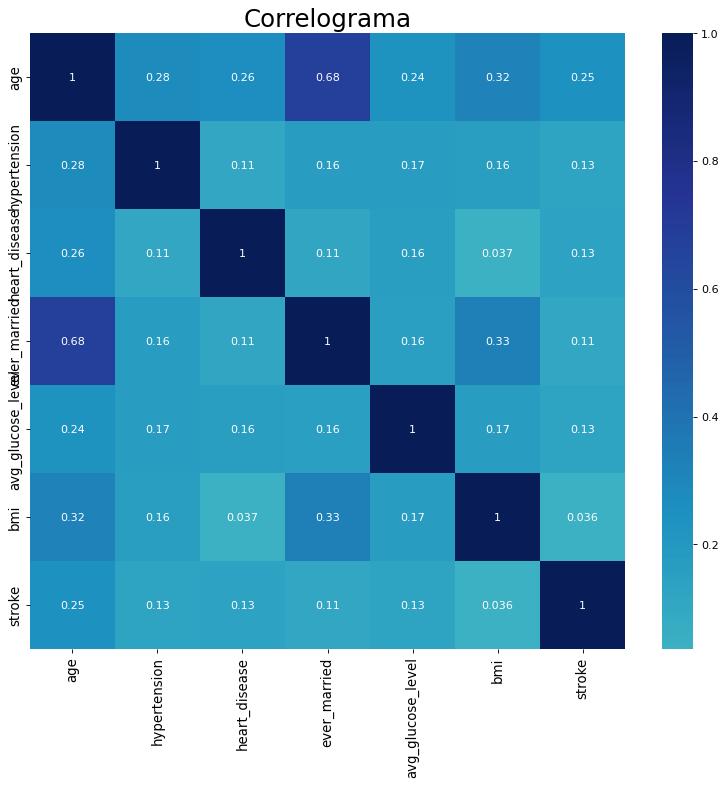

In [706]:
# Gráfica de correlación
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(datos.corr(), xticklabels=datos.corr().columns, yticklabels=datos.corr().columns, center=0, annot=True, cmap="YlGnBu")
plt.title('Correlograma', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Modelos de aprendizaje supervisado

### Clasificación - regresión logística

In [707]:
X = datos.drop(columns=["stroke", "smoking_status", "bmi_category", "age_group", "glucose_category"])
y = datos["stroke"]

In [708]:
label_encoder = LabelEncoder()
labels = {}

for i in X:
    if isinstance(X[i][0],str):
        X[i] = label_encoder.fit_transform(datos[i])
        labels[i]=label_encoder.classes_

X.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,1,67.0,False,True,True,2,1,228.69,36.6
1,0,61.0,False,False,True,3,0,202.21,28.1
2,1,80.0,False,True,True,2,0,105.92,32.5
3,0,49.0,False,False,True,2,1,171.23,34.4
4,0,79.0,True,False,True,3,0,174.12,24.0


In [709]:
random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [710]:
logreg = LogisticRegression(solver="liblinear", max_iter=1000) #class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [711]:
pd.DataFrame(logreg.coef_, columns=X.columns, index=["Coefficients"]).transpose()


,Coefficients
gender,-0.293346
age,0.057094
hypertension,0.487025
heart_disease,0.438304
ever_married,-0.604962
work_type,-0.095659
Residence_type,0.066076
avg_glucose_level,0.003580
bmi,-0.031023


In [712]:
pd.DataFrame([logreg.intercept_], columns =["Intercept"])


,Intercept
0,-4.934499


In [713]:
predictions = logreg.predict(X_test)
print(f"Accuracy on test set: {round(logreg.score(X_test,y_test),2)}")

Accuracy on test set: 0.95


In [714]:
C = confusion_matrix(y_test, predictions)
print("Matriz de confusión\n",C)
print(C / C.astype(np.float).sum(axis=0))

Matriz de confusión
 [[2428    1]
 [ 125    1]]
[[0.95103799 0.5       ]
 [0.04896201 0.5       ]]


In [715]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

       False       0.95      1.00      0.97      2429
        True       0.50      0.01      0.02       126

    accuracy                           0.95      2555
   macro avg       0.73      0.50      0.50      2555
weighted avg       0.93      0.95      0.93      2555



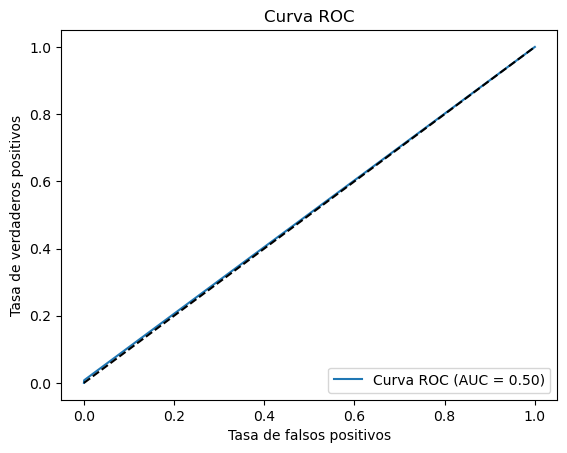

In [716]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)

# Gráfico de la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### Árbol de decisión

In [717]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creación y entrenamiento del modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [718]:
# Evaluación del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 90.87%


In [719]:
C = confusion_matrix(y_test, y_pred)
print("Matriz de confusión\n",C)
print(C / C.astype(np.float).sum(axis=0))

Matriz de confusión
 [[1378   66]
 [  74   15]]
[[0.94903581 0.81481481]
 [0.05096419 0.18518519]]


In [720]:
reporte = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(reporte)

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95      1444
        True       0.19      0.17      0.18        89

    accuracy                           0.91      1533
   macro avg       0.57      0.56      0.56      1533
weighted avg       0.90      0.91      0.91      1533



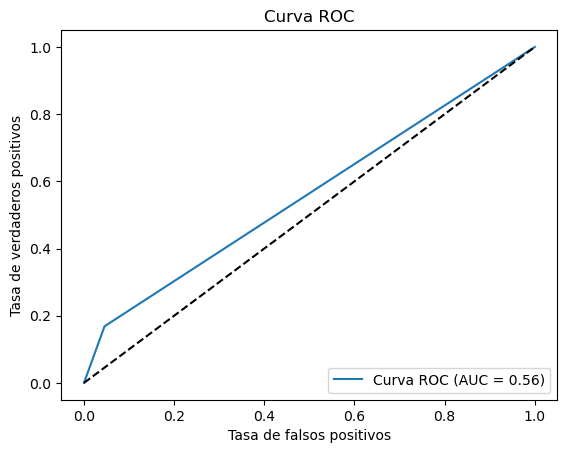

In [721]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Gráfico de la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

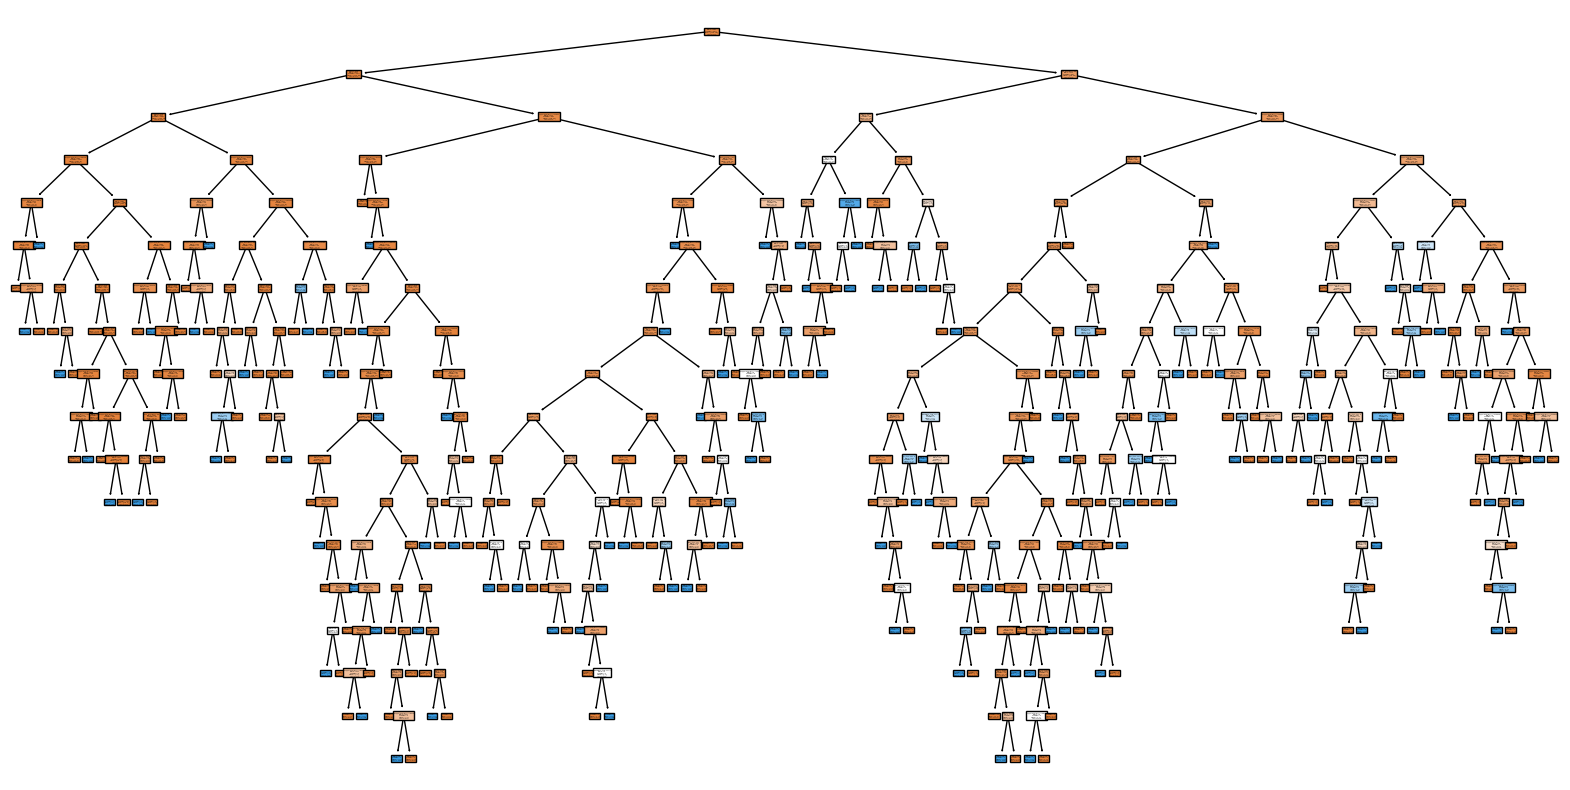

In [722]:
plt.figure(figsize=(20, 10))
class_names = [str(c) for c in model.classes_]
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

### SVM

### K-nearest neighbor

In [723]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [724]:
n_neighbors = 7
#definimos y entrenamos el modelo
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
#imprimimos exactitud del modelo y el entrenamiento
print('Exactitud del modelo K-NN classifier para training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Exactitud del modelo K-NN classifier para test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Exactitud del modelo K-NN classifier para training set: 0.95
Exactitud del modelo K-NN classifier para test set: 0.95


In [725]:
#Imprimimos mtriz de confusion y su reporte de clasificación
pred = knn.predict(X_test)
C = confusion_matrix(y_test, pred)
print("Matriz de confusión\n",C)
print(C / C.astype(np.float).sum(axis=0))

print(classification_report(y_test, pred))

Matriz de confusión
 [[1932   12]
 [  99    1]]
[[0.95125554 0.92307692]
 [0.04874446 0.07692308]]
              precision    recall  f1-score   support

       False       0.95      0.99      0.97      1944
        True       0.08      0.01      0.02       100

    accuracy                           0.95      2044
   macro avg       0.51      0.50      0.49      2044
weighted avg       0.91      0.95      0.93      2044



In [726]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy del modelo:",round(accuracy, 2))

Accuracy del modelo: 0.95


In [727]:
#Predicciones y su valor real
for i in range(len(pred)):
    print("Predicción1:", pred[i] , "         ValorReal:", y_test.values[i])

Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción1: False          ValorReal: False
Predicción

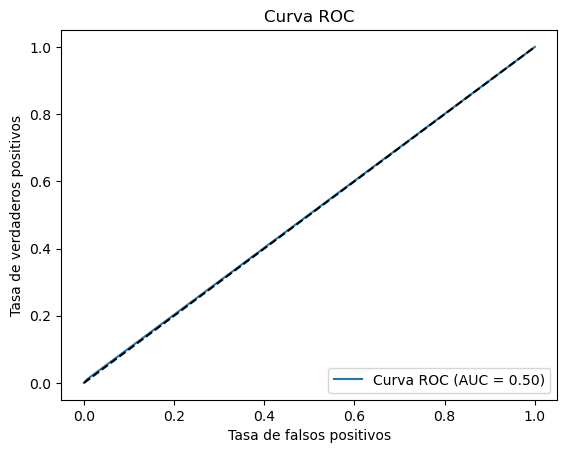

In [728]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)

# Gráfico de la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()